$~$

# IT Academy - Data Science Itinerary



$~$

## S12 T01: Advanced machine learning

___


$~$

*This project consists of **two parts**, in **the first part** we are going to make a random forest prediction model. Here we will practice downloading data from a web page and saving it to the workspace. We are also going to use **pipelines**, which is a tool that will help us automate the pre-processing of the data. In addition, we are going to adjust the **hyperparameters** of the model, which will help us to improve its performance.*

$~$
***The second part** of the project we are going to start doing webscraping. We are going to pick up a text from the **New York Times** and we are going to analyze it. In this part we are going to practice the following: First of all we are going to use the **BeautifulSoup** library, which is one of the most used tools for **webscrapping**.
We will also practice **creating functions**. Which will help us improve programming skills.
We will also practice **text preprocessing**. We will also approach natural language processing. We will use libraries like **NLTK**, **Spacy**, **TexBlob***.

$~$

*On the other hand, we will practice the use of **lambda functions**, among other things.*

$~$

In [862]:
#importing libraries
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, f1_score, roc_auc_score


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,f1_score
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

plt.style.use("ggplot")

from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy


$~$
___
####  Exercise 1

$~$

Grab the data set you want and do a pipeline and a gridsearch using the Random Forest algorithm.


$~$
___

$~$

For this exercice, we goint to work with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.

$~$


The dataset is composed by the following variables:

$~$

1.  Class Name: 2 (democrat, republican)
2.  handicapped-infants: 2 (y,n)
3.  water-project-cost-sharing: 2 (y,n)
4.  adoption-of-the-budget-resolution: 2 (y,n)
5.  physician-fee-freeze: 2 (y,n)
6.  el-salvador-aid: 2 (y,n)
7.  religious-groups-in-schools: 2 (y,n)
8.  anti-satellite-test-ban: 2 (y,n)
9.  aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)

$~$



$~$ 

#### Downloanding the dataset:
___
$~$ 

$~$

We are going to download the dataset directly from the UCI Machine Learning Repository website. For them we will use the **urlretrive()** library

$~$


In [2]:
## Specify the url: url

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

In [3]:
# Save file locally
urlretrieve(url, "data_voting.csv")
# Read file into a DataFrame and print its head
df = pd.read_csv('data_voting.csv', sep=',')
# assign names to columns:
name_features= ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.columns = name_features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              434 non-null    object
 1   infants            434 non-null    object
 2   water              434 non-null    object
 3   budget             434 non-null    object
 4   physician          434 non-null    object
 5   salvador           434 non-null    object
 6   religious          434 non-null    object
 7   satellite          434 non-null    object
 8   aid                434 non-null    object
 9   missile            434 non-null    object
 10  immigration        434 non-null    object
 11  synfuels           434 non-null    object
 12  education          434 non-null    object
 13  superfund          434 non-null    object
 14  crime              434 non-null    object
 15  duty_free_exports  434 non-null    object
 16  eaa_rsa            434 non-null    object
dt

In [5]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [830]:
df.party.value_counts(normalize=True).round(2)

democrat      0.62
republican    0.38
Name: party, dtype: float64

$~$

We observe that the classes are unbalanced, we have more data from the Democratic Party. On the other hand, we see that the values in our dataset are "string", that the variables are binomial and that there are missing values that have a question mark(?)

$~$

$~$ 

#### Preprocesing the dataset:
___
$~$ 

$~$

+ The first thing we are going to do is change the type to each of the columns, they are all **categorical**.

$~$

+ then we are going to see how many missing values we have inside the dataset (note that the **missing values** are the **"?"** values) we are going to transform them to numpy nan, in order to be able to treat them.

$~$

+ then we are going to **implement a pipeline** with two steps:

    + In the first step we are going to **impute** to **the null values**, the **most frequent values**. This, because our dataset is small and we cannot delete data. It is true that we could assign the average value, but in this case we have decided to use the most frequent value.

    + In the second step we are going to implement a **Onehot Encodig** to our variables, which as we have already seen are binomial.

$~$

once we have all this done, we can proceed to performance the **random forest classifier** model

$~$

+  changing the type to the columns:

In [6]:
#change type to categorical
for x in df.columns:
        df[x] = df[x].astype("category")

$~$

+ we already know that we have missing values and that these are values are the values "?" let's see how many of these we have:

$~$

In [7]:
#how many "?" values we have ?
df[df == '?'].count()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              20
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

$~$

+ Since we have many "Nan" values and our dataset is small, we are going to use the strategy of assigning the most repeated value to the repeated values

$~$

In [8]:
df[df == "?"] = np.nan

In [95]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


$~$

+ **implement a pipeline**: with 2 steps.

$~$

In [9]:
#step 1:
       #  Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

#step 2:
       # setup a one hot enconder to transform data into binary
encoder = OneHotEncoder(drop="if_binary")

# performance a Pipeline
       # Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
       ('encoder', encoder)]

#create a pipeline
pipeline = Pipeline(steps)

#keep transform values
data = pipeline.fit_transform(df).toarray()

#transforme data to dataframe
data = pd.DataFrame(data,columns=name_features)


In [10]:
data

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
431,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
432,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


$~$

+ Once we have preprocessed our data we can performance the model.

$~$

$~$ 

#### The RandomForest model:
___
$~$ 

$~$

As we have said before, we are going to performance a random forest classifer model following the next steps:

$~$

+ define the objective variable and the explanatory variables (y, X)
$~$

+ divide the data (X_train, X_test, y_train, y_test) and, since we know that we have unbalanced classes, we will use the "stratified" parameter.
$~$

+ performance a first model and see its metrics. (This will help us later to compare these results with the second model that we are going to performace.).
$~$

+ plot the **confusion matrix** and the **ROC curve**.
$~$

+ perform a hyperparameter tuning on this first model to improve its results. For them we are going to use the **grindsearch** method.
$~$

+ we show the best hyperparameters and the metrics obtained by the gridsearch.
____

$~$

+ define X and  y:

In [11]:
y =data["party"].values

X = data.drop(["party"],axis=1).values

+ split the data

In [12]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True,stratify=y)

+ #### **performance a first model:**

In [13]:
#create model rfc1
rfc1 = RandomForestClassifier(random_state=42)

rfc1.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

+ shows its metrics:

In [14]:
# Predict the labels of the test set: y_pred1
y_pred1 = rfc1.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(rfc1.score(X_test, y_test)))
print(classification_report(y_test, y_pred1))



Accuracy: 0.9694656488549618
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98        81
         1.0       0.98      0.94      0.96        50

    accuracy                           0.97       131
   macro avg       0.97      0.96      0.97       131
weighted avg       0.97      0.97      0.97       131



In [15]:
report1 = classification_report(y_test, y_pred1 ,output_dict=True)
report1 = pd.DataFrame(report1).transpose()
#keep confusion matrix
cf_matrix1 = confusion_matrix(y_test, y_pred1)
#keep acurracy
acu1 = accuracy_score(y_test, y_pred1)
#keep AUC
auc1 = roc_auc_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1, average="macro" )

In [16]:
report1

,precision,recall,f1-score,support
0.0,0.963855,0.987654,0.975610,81.000000
1.0,0.979167,0.940000,0.959184,50.000000
accuracy,0.969466,0.969466,0.969466,0.969466
macro avg,0.971511,0.963827,0.967397,131.000000
weighted avg,0.969699,0.969466,0.969340,131.000000


In [1154]:
print("f1 macro score: ",f1_1)

f1 macro score:  0.9673967147834743


+ confusion matrix and the ROC curve:

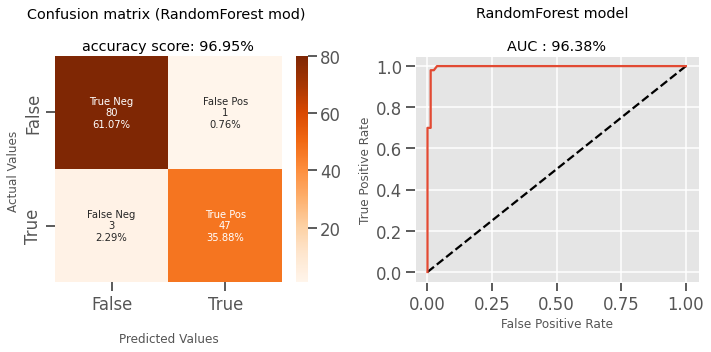

In [18]:
sns.set_context("talk")
plt.style.use('ggplot')

fig, axes = plt.subplots(1,2,figsize=(10,5),alpha=0.5)
group_names = ['True Neg','False Pos','False Neg','True Pos']

######## plot confidence matrix

   
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Oranges',ax=axes[0])
axes[0].set_title('Confusion matrix (RandomForest mod) \n\n' + "accuracy score: {0:.2%}".format(acu1));
axes[0].set_xlabel('\nPredicted Values')
axes[0].set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
axes[0].xaxis.set_ticklabels(['False','True'])
axes[0].yaxis.set_ticklabels(['False','True'])

#plot AUC curve

y_pred_prob = rfc1.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].plot(fpr1, tpr1, label='Random forest classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('RandomForest model  \n\n'+ "AUC : {0:.2%}".format(auc1))


plt.tight_layout()
plt.show()

$~$

Our first model has a good result, however let's see if we can get better results.

$~$

$~$

+ #### **performance a hyperparameter tuning:**

$~$


In [19]:
rfc = RandomForestClassifier(random_state=42)

# Specify the hyperparameter
parameters = { 
    'n_estimators': [50,100, 200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 4, 6, 8, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [12,20,40],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Inicial the GridSearchCV object: cv
cv = GridSearchCV(rfc,param_grid=parameters,cv=5,scoring="f1_macro")


# Fit to the training set

cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [12, 20, 40],
                         'n_estimators': [50, 100, 200, 400, 600]},
             scoring='f1_macro')

+ shows the best hyperparametres and metrics after hyperparameter tuning:

In [20]:
# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.9756460308607547
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        81
         1.0       0.98      0.96      0.97        50

    accuracy                           0.98       131
   macro avg       0.98      0.97      0.98       131
weighted avg       0.98      0.98      0.98       131

Tuned Model Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 50}


In [21]:
#keep scrore
report = classification_report(y_test, y_pred ,output_dict=True)
report = pd.DataFrame(report).transpose()
#keep confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#keep acurracy
acu = accuracy_score(y_test, y_pred)
#keep AUC
auc = roc_auc_score(y_test, y_pred)
f1_macro= f1_score(y_test, y_pred, average="macro" )

In [22]:
report

,precision,recall,f1-score,support
0.0,0.975610,0.987654,0.981595,81.000000
1.0,0.979592,0.960000,0.969697,50.000000
accuracy,0.977099,0.977099,0.977099,0.977099
macro avg,0.977601,0.973827,0.975646,131.000000
weighted avg,0.977130,0.977099,0.977054,131.000000


+ compare the metrics:

In [1155]:
print("f1 macro score before gridsearch: ",f1_1)
print("f1 macro score after gridsearch: ",f1_macro)

f1 macro score before gridsearch:  0.9673967147834743
f1 macro score after gridsearch:  0.9756460308607547


+ confusion matrix and the ROC curve:

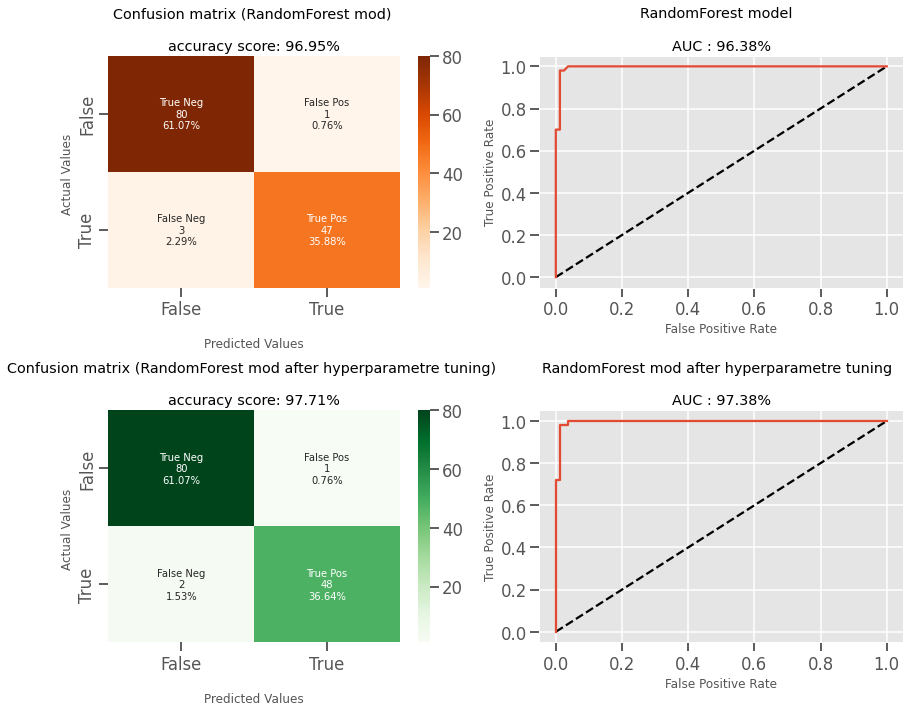

In [1159]:
sns.set_context("talk")
plt.style.use('ggplot')

fig, axes = plt.subplots(2,2,figsize=(12,10),alpha=0.5)
group_names = ['True Neg','False Pos','False Neg','True Pos']

######## plot confidence matrix

    #mod 

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Oranges',ax=axes[0,0])
axes[0,0].set_title('Confusion matrix (RandomForest mod) \n\n' + "accuracy score: {0:.2%}".format(acu1));
axes[0,0].set_xlabel('\nPredicted Values')
axes[0,0].set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
axes[0,0].xaxis.set_ticklabels(['False','True'])
axes[0,0].yaxis.set_ticklabels(['False','True'])


   #mod after hyperparametre tuning
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens',ax=axes[1,0])
axes[1,0].set_title('Confusion matrix (RandomForest mod after hyperparametre tuning) \n\n' + "accuracy score: {0:.2%}".format(acu));
axes[1,0].set_xlabel('\nPredicted Values')
axes[1,0].set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
axes[1,0].xaxis.set_ticklabels(['False','True'])
axes[1,0].yaxis.set_ticklabels(['False','True'])

#plot AUC curve
    #mod 1

y_pred_prob = rfc1.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)
axes[0,1].plot([0, 1], [0, 1], 'k--')
axes[0,1].plot(fpr1, tpr1, label='Random forest classifier')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('RandomForest model  \n\n'+ "AUC : {0:.2%}".format(auc1))





    #mod after hyperparametre tuning
y_pred_prob = cv.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)
axes[1,1].plot([0, 1], [0, 1], 'k--')
axes[1,1].plot(fpr1, tpr1, label='RandomForest classifier')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('RandomForest mod after hyperparametre tuning  \n\n'+ "AUC : {0:.2%}".format(auc))


plt.tight_layout()
plt.show()

$~$

As it can see in the plot above, ***hyperparameter tuning helps us improve the performance of the model***.

$~$

$~$
___
####  Exercise 2

$~$

Take a text in English that you want, and calculate the frequency of the words



$~$
___

$~$

For this exercise, we are first going to scrape the website of the [New York Times newspaper](https://www.nytimes.com/). We are going to take the [editorial (from may 16,2022)](https://www.nytimes.com/2022/05/16/opinion/buffalo-shooting-replacement-theory.html) and we are going to analyze it. 

$~$

to get the text  we are going to use the library [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#)

$~$

$~$

#### **Geting the text from the web:**

$~$

In [1050]:
#define the url 
url_text = "https://www.nytimes.com/2022/05/16/opinion/buffalo-shooting-replacement-theory.html"


In [1051]:
s = requests.Session()
#skip the filters from the web
s.cookies["cf_clearance"] = "cb4c883efc59d0e990caf7508902591f4569e7bf-1617321078-0-150"
s.headers.update({
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"
        })
s = s.get(url_text)

# Extracts the response as html: html_doc
hmtl_doc = s.text
# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(hmtl_doc)
# Get the title of article: article_title
article_title = soup.title
# Get article text: article_text
article_text = soup.get_text()


In [1052]:
# Print article title to the shell
article_title.get_text()

'Opinion | The Buffalo Shooting Was Not a Random Act of Violence - The New York Times'

In [1053]:
# Print article text to the shell
print(article_text)




Opinion | The Buffalo Shooting Was Not a Random Act of Violence - The New York Times
  


















SectionsSEARCHSkip to contentSkip to site indexLog inToday’s PaperOpinion|The Buffalo Shooting Was Not a Random Act of Violencehttps://www.nytimes.com/2022/05/16/opinion/buffalo-shooting-replacement-theory.htmlGive this article1219AdvertisementContinue reading the main storyOpinionSupported byContinue reading the main storyThe Editorial BoardThe Buffalo Shooting Was Not a Random Act of ViolenceMay 16, 2022Credit...Illustration by Rebecca Chew/The New York Times; photograph by NK08gerd, via Getty ImagesSend any friend a storyAs a subscriber, you have 10 gift articles to give each month. Anyone can read what you share.Give this article1219Read in appBy The Editorial BoardThe editorial board is a group of opinion journalists whose views are informed by expertise, research, debate and certain longstanding values. It is separate from the newsroom.Republican politicians, including som

$~$

As you can see, we have obtained the text, but we still need to do a bit of cleaning. Let's clean up the text:

$~$

In [1054]:
#find the start of text
start = article_text.find("Republican politicians, including some of the party’s top")
#find the end of the text
end = article_text.find("@GOP leaders must renounce and reject these views and those who hold them")
# get a clean text
article_text = article_text[start:end]
# print the text
print(article_text)

Republican politicians, including some of the party’s top leaders, openly espouse versions of a white supremacist conspiracy theory holding that an orchestrated effort is underway to displace white Americans. A recently published poll found that almost half of Republicans believe that immigrants are being brought to the United States as part of such an effort.On Saturday, a gunman who said he was motivated by a version of this “replacement theory” killed 10 people at a Buffalo grocery store, officials said. The suspect, identified as Payton S. Gendron, wrote in an online diatribe that he sought to kill Black people because he wanted to prevent white people from losing their rightful control of the country.Mr. Gendron described himself as part of a movement. He said that he was inspired by similar attacks on other minority communities and that he hoped others would follow his example. The suspects in several mass killings in recent years, including the 2015 murder of nine Black worshipe

$~$

#### **Text preprocesing:**

$~$

Once we have the whole and clean text, we are going to process it.

$~$

+ The first step will be to define a series of functions that we will use later. In the next cell we will define all the functions that we will be using:

$~$

##### **Our functions:**

In [1134]:
# fuctions we are going to use in this project
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = text.replace("—","")
    text = re.sub('\[.*?¿\]\%-', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
#
def clean_text2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

def wordListToFreqDict(wordlist):
    """ create a list of words in a dictionary of words frequency"""
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

def show_values(axs, orient="v", space=.01):
    """ shows the value of the features in the top of the bar plot """
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def clean_stop_words(text):
    """remove stopwords from a given text"""
    # define stopwords
    stop_words=set(stopwords.words("english"))
    #removing stopwords
    filtered_sent=[]
    for w in text :
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent

def createStemmer(listOfWords):
    """create a list of stemmer words from a 
    list of words"""
    ps = PorterStemmer()
    stemmerlist = []  
    for w in listOfWords:
        stemmerlist.append(ps.stem(w))
    return stemmerlist

def sentiment_texblob(ind,text):
    """return a polarity and subjertivity 
    from a given text using TexBlob library
    ind = 0 for polarity
    ind = 1 subjetivity"""
    tex = TextBlob(text)
    result = tex.sentiment
    
    return list(result)[ind]

def get_sia(text):
    """given a text, return a VADER score"""
    sia = SentimentIntensityAnalyzer()
    sia_score = sia.polarity_scores(text)
    return sia_score


$~$

+ The next  will be to separate the text into sentences: for this we are going to use the "sent_tokenize()" function of the NTKL library

$~$

In [1056]:
# Split article_text into sentences: sentences
sentences = sent_tokenize(article_text)

$~$

We will save each of the sentences in a dataframe:

$~$

In [1059]:
#keep sentence into dataframe
data_text = pd.DataFrame(sentences,columns=["transcript"])
#show the dataframe
data_text.head()

,transcript
0,"Republican politicians, including some of the ..."
1,A recently published poll found that almost ha...
2,"The suspect, identified as Payton S. Gendron, ..."
3,Gendron described himself as part of a movement.
4,He said that he was inspired by similar attack...


$~$

+ Now it's time to clean the text, we are going to change all the text to lowercase, remove text between brackets, remove punctuation and remove words that contain numbers. For this we are going to use a function that we have previously defined **"clean_text"**. We are going to use a lambda function to apply **the clean_text()** function to each of the sentences that are stored in our dataframe.

$~$

In [1061]:
round1 = lambda x: clean_text(x)
data_text["clean"] = data_text.transcript.apply(round1)
data_text.head()

,transcript,clean
0,"Republican politicians, including some of the ...",republican politicians including some of the ...
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...


$~$

+ Now let's do a second round of cleanup, we'll remove some extra punctuation and nonsense text that was skipped the first time, for this we're going to use the **clean_text2()** function we defined before. As we did before, we are going to use a lambda function to apply **the clean_text2() function** to each of the sentences that are stored in our dataframe. We will create a new column **"clean2"** in the dataframe

$~$

In [1062]:
round2 = lambda x: clean_text2(x)
data_text["clean2"] = pd.DataFrame(data_text.clean.apply(round2))
data_text.head()

,transcript,clean,clean2
0,"Republican politicians, including some of the ...",republican politicians including some of the ...,republican politicians including some of the ...
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...,a recently published poll found that almost ha...
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...,the suspect identified as payton s gendron ...
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement,gendron described himself as part of a movement
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...,he said that he was inspired by similar attack...


$~$

+ Next, once we have the clean text, we are going to obtain the tokens of each of the clean sentences. For this we are going to use the **"Word_tokenize()**" function of the NLTK library. We will create a lambda function to apply this to each of the rows in our dataframe. We will save the results in the dataframe inside a new column "unique_token"

$~$

In [1063]:
unique = lambda x: word_tokenize(x)
data_text["unique_token"] = pd.DataFrame(data_text.clean2.apply(unique))
data_text.head()

,transcript,clean,clean2,unique_token
0,"Republican politicians, including some of the ...",republican politicians including some of the ...,republican politicians including some of the ...,"[republican, politicians, including, some, of,..."
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...,a recently published poll found that almost ha...,"[a, recently, published, poll, found, that, al..."
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...,the suspect identified as payton s gendron ...,"[the, suspect, identified, as, payton, s, gend..."
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement,gendron described himself as part of a movement,"[gendron, described, himself, as, part, of, a,..."
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...,he said that he was inspired by similar attack...,"[he, said, that, he, was, inspired, by, simila..."


$~$

+ the next step will be to create the word frequency. To do this, we have previously defined a function **wordListToFreqDict()** that receives a list of words and returns a dictionary of the frequency of the words. To apply this to each row of our dataframe, we are going to set up a lambda function. The result is stored in the new column "freq"

$~$

In [1064]:
unique = lambda x: wordListToFreqDict(x)
data_text["freq"] = pd.DataFrame(data_text.unique_token.apply(unique))
data_text.head()

,transcript,clean,clean2,unique_token,freq
0,"Republican politicians, including some of the ...",republican politicians including some of the ...,republican politicians including some of the ...,"[republican, politicians, including, some, of,...","{'republican': 1, 'politicians': 1, 'including..."
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...,a recently published poll found that almost ha...,"[a, recently, published, poll, found, that, al...","{'a': 4, 'recently': 1, 'published': 1, 'poll'..."
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...,the suspect identified as payton s gendron ...,"[the, suspect, identified, as, payton, s, gend...","{'the': 2, 'suspect': 1, 'identified': 1, 'as'..."
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement,gendron described himself as part of a movement,"[gendron, described, himself, as, part, of, a,...","{'gendron': 1, 'described': 1, 'himself': 1, '..."
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...,he said that he was inspired by similar attack...,"[he, said, that, he, was, inspired, by, simila...","{'he': 3, 'said': 1, 'that': 2, 'was': 1, 'ins..."


$~$

We already have a dataframe that contains each of the pre-processed sentences, and that we will continue to use later.

$~$

+ Now we are going to create a dictionary of frequencies for all the text, we are going to store it in a new dataframe where we will store the word and its frequency of appearance. And then, once we have the dataframe, we will create a plot where we can visualize the twenty most used words in our article

$~$

In [1065]:
raw_text= article_text
# first round of clean
article_text_clean = clean_text(article_text)
# second round of clean
article_text_clean2 = clean_text2(article_text_clean)
# Tokenize all the text
article_text_token = word_tokenize(article_text_clean2)
#create a dict of frequencies of the tokenize list
dic_freq = wordListToFreqDict(article_text_token)
#create a dataframe with the dictionary of words frequency
df_freq = pd.DataFrame(list(dic_freq.items()),columns = ['words','freq'])


In [1066]:
df_freq.sort_values(by="freq",ascending=False).head()

,words,freq
5,the,77
4,of,46
18,that,25
24,to,23
69,in,22


In [1067]:
#keep 20 most used word in a diferent dataframe
df_freq_to_plot = df_freq.nlargest(n=20, columns=['freq'], keep='all')

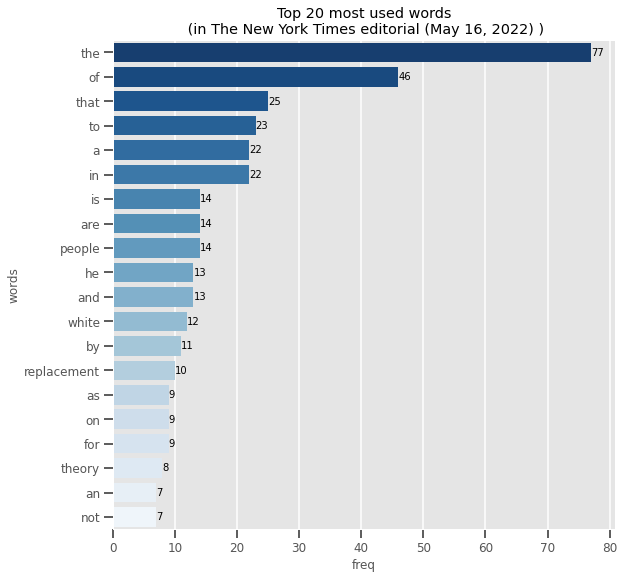

In [1068]:
#create a plot with the 20 most used word in the article
sns.set_context("talk")
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize =(9,9))
ax = sns.barplot(y="words", x="freq", data=df_freq_to_plot,palette="Blues_r",ax=ax)
ax.bar_label(ax.containers[0])
plt.title("Top 20 most used words\n (in The New York Times editorial (May 16, 2022) )")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

$~$

As you can see from the plot above, the most commonly used words are **words with little or no meaning** that help form a sentence.To get a better idea of the **words with meaning** that were used in the text, we will have to remove these words (which are known as **stopwords**), this is precisely what we will do next.

$~$


$~$
___
####  Exercise 3

$~$

Remove the stopwords and stemming your dataset.


$~$
___

$~$

+ To remove the stopwords from the text we have previously prepared the **clean_stop_words()** function that receives a text and returns the text without the stopwords. To apply the stop_words() function to each of the rows of our dataset (we will use what is saved in the "unique_token" column) we have defined a lambda function, the result is saved in a new column "without_sw".

$~$

In [1069]:
clean_s_w = lambda x : clean_stop_words(x)
data_text["without_sw"] = pd.DataFrame(data_text["unique_token"].apply(clean_s_w))
data_text.head()

,transcript,clean,clean2,unique_token,freq,without_sw
0,"Republican politicians, including some of the ...",republican politicians including some of the ...,republican politicians including some of the ...,"[republican, politicians, including, some, of,...","{'republican': 1, 'politicians': 1, 'including...","[republican, politicians, including, partys, t..."
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...,a recently published poll found that almost ha...,"[a, recently, published, poll, found, that, al...","{'a': 4, 'recently': 1, 'published': 1, 'poll'...","[recently, published, poll, found, almost, hal..."
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...,the suspect identified as payton s gendron ...,"[the, suspect, identified, as, payton, s, gend...","{'the': 2, 'suspect': 1, 'identified': 1, 'as'...","[suspect, identified, payton, gendron, wrote, ..."
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement,gendron described himself as part of a movement,"[gendron, described, himself, as, part, of, a,...","{'gendron': 1, 'described': 1, 'himself': 1, '...","[gendron, described, part, movement]"
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...,he said that he was inspired by similar attack...,"[he, said, that, he, was, inspired, by, simila...","{'he': 3, 'said': 1, 'that': 2, 'was': 1, 'ins...","[said, inspired, similar, attacks, minority, c..."


$~$

+ once we have removed the stopwords, we will re-generate a dictionary with the frequency of the words. We use the **wordListToFreqDict()** function again and save the result in a new column "freq2"

$~$


In [1070]:
unique = lambda x: wordListToFreqDict(x)
data_text["freq2"] = pd.DataFrame(data_text.without_sw.apply(unique))
data_text.head()

,transcript,clean,clean2,unique_token,freq,without_sw,freq2
0,"Republican politicians, including some of the ...",republican politicians including some of the ...,republican politicians including some of the ...,"[republican, politicians, including, some, of,...","{'republican': 1, 'politicians': 1, 'including...","[republican, politicians, including, partys, t...","{'republican': 1, 'politicians': 1, 'including..."
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...,a recently published poll found that almost ha...,"[a, recently, published, poll, found, that, al...","{'a': 4, 'recently': 1, 'published': 1, 'poll'...","[recently, published, poll, found, almost, hal...","{'recently': 1, 'published': 1, 'poll': 1, 'fo..."
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...,the suspect identified as payton s gendron ...,"[the, suspect, identified, as, payton, s, gend...","{'the': 2, 'suspect': 1, 'identified': 1, 'as'...","[suspect, identified, payton, gendron, wrote, ...","{'suspect': 1, 'identified': 1, 'payton': 1, '..."
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement,gendron described himself as part of a movement,"[gendron, described, himself, as, part, of, a,...","{'gendron': 1, 'described': 1, 'himself': 1, '...","[gendron, described, part, movement]","{'gendron': 1, 'described': 1, 'part': 1, 'mov..."
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...,he said that he was inspired by similar attack...,"[he, said, that, he, was, inspired, by, simila...","{'he': 3, 'said': 1, 'that': 2, 'was': 1, 'ins...","[said, inspired, similar, attacks, minority, c...","{'said': 1, 'inspired': 1, 'similar': 1, 'atta..."


$~$

after have removed the stopwords, we are going to create a new dataframe with the word frequency of the entire text. Then we are going to generate a plot where we are going to show the 20 most used words in the text and we are going to compare this graph with the previous one (where we showed the text without removing the stopswords)

$~$

In [1071]:
#quit the stopwords
art_without_sw = clean_stop_words(article_text_token)
#calculate the frequency of the words (without stopswords)
dic_freq2 = wordListToFreqDict(art_without_sw)
#create a dataframe with the frequency of words
df_freq2 = pd.DataFrame(list(dic_freq2.items()),columns = ['words','freq'])
#show the dataframe
df_freq2.sort_values(by="freq",ascending=False).head()

,words,freq
39,people,14
9,white,12
37,replacement,10
12,theory,8
91,new,6


In [1072]:
#keep 20 most used words in a new dataframe
df_freq_to_plot2 = df_freq2.nlargest(n=20, columns=['freq'])

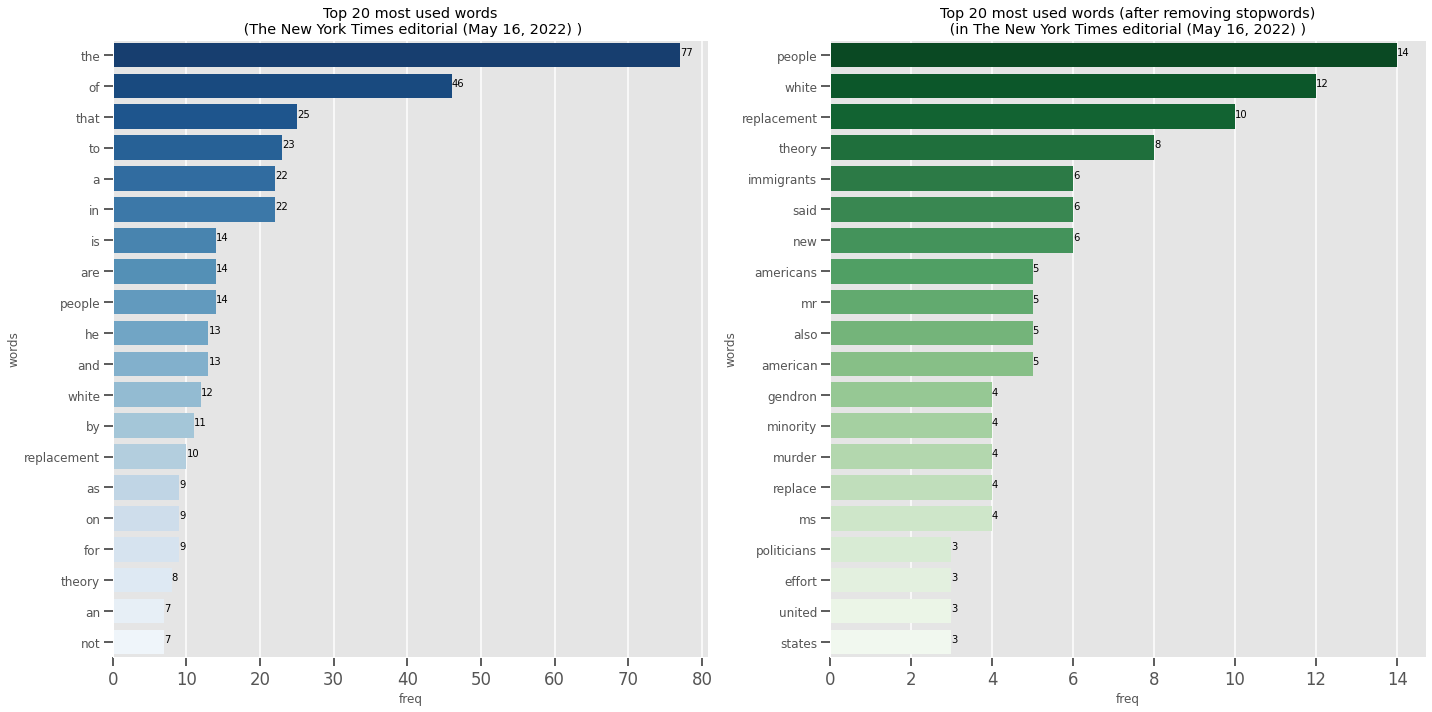

In [1073]:
#generate a plot

sns.set_context("talk")
plt.style.use('ggplot')

#plot 1 with stopwords
fig, axes = plt.subplots(1,2,figsize =(20, 10))
ax = sns.barplot(y="words", x="freq", data=df_freq_to_plot,palette="Blues_r",ax=axes[0])
show_values(ax,"h",space=0)
ax.set(title="Top 20 most used words\n (The New York Times editorial (May 16, 2022) )")
ax.tick_params(axis="y",labelsize=12)

#plot 2 after removing stopwords
ax1 = sns.barplot(y="words", x="freq", data=df_freq_to_plot2, palette="Greens_r",ax=axes[1])
ax1.set(title="Top 20 most used words (after removing stopwords)\n (in The New York Times editorial (May 16, 2022) ) ")
ax1.tick_params(axis="y",labelsize=12)
show_values(ax1,"h",space=0)

plt.tight_layout()
plt.show()

$~$

Once the stopwords of the article are removed, the most used words that we see in the previous graph make more sense

$~$

$~$

+  the next thing we will do is **stemming** the text. This means ***educing a word to its stem or root format**. for this we will use the **createStemmer()** function that we have previously defined. We will save the result in a new column of our dataframe that we will call stemmer. Next, we will create a dictionary with the frequency of the stemmer. And we will save the result in a new column "freq_stemmer".

$~$


In [1074]:
#performance stemmer
stemmer = lambda x : createStemmer(x)
#keep result in new column
data_text["stemmer"] = pd.DataFrame(data_text.without_sw.apply(stemmer))

In [1075]:
#performace frequency of stemmers
unique = lambda x: wordListToFreqDict(x)
#keep result in new column
data_text["freq_stemmer"] = pd.DataFrame(data_text.stemmer.apply(unique))
data_text.head()

,transcript,clean,clean2,unique_token,freq,without_sw,freq2,stemmer,freq_stemmer
0,"Republican politicians, including some of the ...",republican politicians including some of the ...,republican politicians including some of the ...,"[republican, politicians, including, some, of,...","{'republican': 1, 'politicians': 1, 'including...","[republican, politicians, including, partys, t...","{'republican': 1, 'politicians': 1, 'including...","[republican, politician, includ, parti, top, l...","{'republican': 1, 'politician': 1, 'includ': 1..."
1,A recently published poll found that almost ha...,a recently published poll found that almost ha...,a recently published poll found that almost ha...,"[a, recently, published, poll, found, that, al...","{'a': 4, 'recently': 1, 'published': 1, 'poll'...","[recently, published, poll, found, almost, hal...","{'recently': 1, 'published': 1, 'poll': 1, 'fo...","[recent, publish, poll, found, almost, half, r...","{'recent': 1, 'publish': 1, 'poll': 1, 'found'..."
2,"The suspect, identified as Payton S. Gendron, ...",the suspect identified as payton s gendron ...,the suspect identified as payton s gendron ...,"[the, suspect, identified, as, payton, s, gend...","{'the': 2, 'suspect': 1, 'identified': 1, 'as'...","[suspect, identified, payton, gendron, wrote, ...","{'suspect': 1, 'identified': 1, 'payton': 1, '...","[suspect, identifi, payton, gendron, wrote, on...","{'suspect': 1, 'identifi': 1, 'payton': 1, 'ge..."
3,Gendron described himself as part of a movement.,gendron described himself as part of a movement,gendron described himself as part of a movement,"[gendron, described, himself, as, part, of, a,...","{'gendron': 1, 'described': 1, 'himself': 1, '...","[gendron, described, part, movement]","{'gendron': 1, 'described': 1, 'part': 1, 'mov...","[gendron, describ, part, movement]","{'gendron': 1, 'describ': 1, 'part': 1, 'movem..."
4,He said that he was inspired by similar attack...,he said that he was inspired by similar attack...,he said that he was inspired by similar attack...,"[he, said, that, he, was, inspired, by, simila...","{'he': 3, 'said': 1, 'that': 2, 'was': 1, 'ins...","[said, inspired, similar, attacks, minority, c...","{'said': 1, 'inspired': 1, 'similar': 1, 'atta...","[said, inspir, similar, attack, minor, commun,...","{'said': 1, 'inspir': 1, 'similar': 1, 'attack..."


$~$

+ Once we have stemmed the text, we are going to create a new dataframe with the frequency of the stemmer obtained and we are going to create a plot to compare how the 20 most used words change according to the process that we have given to the text.

$~$

In [1076]:
#stemming the text
stemme_text = createStemmer(art_without_sw)
#create frequency of stemmer
freqsteme = wordListToFreqDict(stemme_text)
#create a dataframe with the frequency of stemmerWords
df_freqSteme = pd.DataFrame(list(freqsteme.items()),columns = ['words','freq'])
#show the dataframe
df_freqSteme.sort_values(by="freq",ascending=False).head()

,words,freq
37,peopl,14
35,replac,14
9,white,12
18,american,10
12,theori,8


In [1077]:
#keep data to plot
df_freq_to_plot3 = df_freqSteme.nlargest(n=20, columns=['freq'])

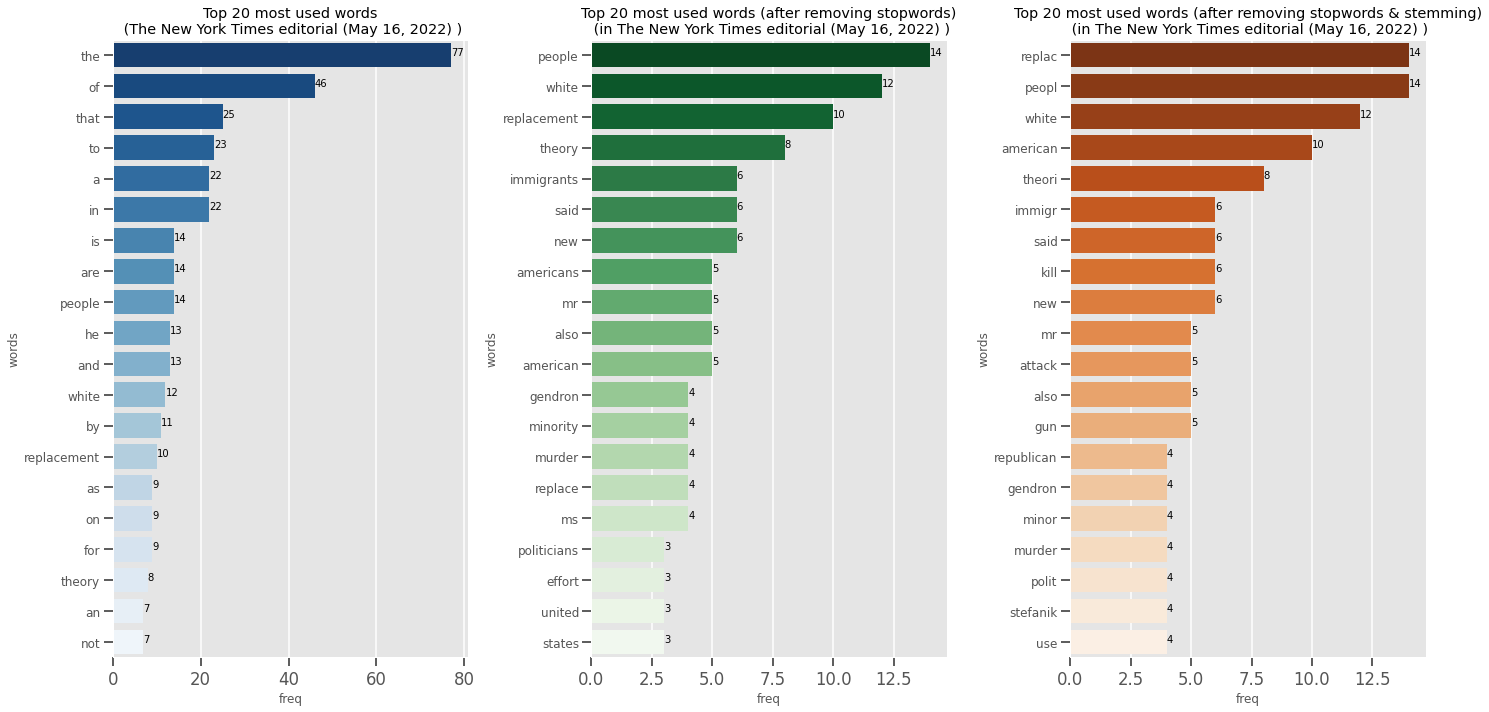

In [1078]:
#generate a plot
sns.set_context("talk")
plt.style.use('ggplot')

fig, axes = plt.subplots(1,3,figsize =(20, 10))

#plot 1 with stopwords

ax = sns.barplot(y="words", x="freq", data=df_freq_to_plot,palette="Blues_r",ax=axes[0])
show_values(ax,"h",space=0)
ax.set(title="Top 20 most used words\n (The New York Times editorial (May 16, 2022) )")
ax.tick_params(axis="y",labelsize=12)

#plot 2 after removing stopwords

ax1 = sns.barplot(y="words", x="freq", data=df_freq_to_plot2, palette="Greens_r",ax=axes[1])
ax1.set(title="Top 20 most used words (after removing stopwords)\n (in The New York Times editorial (May 16, 2022) )")
ax1.tick_params(axis="y",labelsize=12)
show_values(ax1,"h",space=0)

#plot 3 after stemmers

ax2 = sns.barplot(y="words", x="freq", data=df_freq_to_plot3, palette="Oranges_r",ax=axes[2])
ax2.set(title="Top 20 most used words (after removing stopwords & stemming)\n (in The New York Times editorial (May 16, 2022) )")
ax2.tick_params(axis="y",labelsize=12)
show_values(ax2,"h",space=0)

plt.tight_layout()
plt.show()

$~$

##### **performance a Named Entity Recognition:** (extra):

$~$

$~$

**Named Entity Recognition**: or NER for short is a natural language processing task used to identify important named entities in the text -- such as people, places and organizations -- they can even be dates, states, works of art and other categories depending on the libraries and notation the library you use. NER can be used alongside topic identification, or on its own to determine important items in a text or answer basic natural language understanding questions such as who? what? when and where?

$~$

let's perform a NER on our text, so that we can answer the questions  who?, when? and where?. for this we are going to use the [spacy library](https://spacy.io/) which allows us to do this effectively.

$~$

In [1079]:
# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm")
# Create a new document: doc
doc = nlp(raw_text)
label = []
entite = []
# Print all of the found entities and their labels
for ent in doc.ents:
    label.append(ent.label_),entite.append(ent.text)

#keep entities in a new dataframe
data_entite = pd.DataFrame(list(zip(label,entite)), columns=["label","entite"])

In [1080]:
data_entite.head()

,label,entite
0,NORP,Republican
1,NORP,Americans
2,CARDINAL,almost half
3,NORP,Republicans
4,GPE,the United States


$~$

we are going to make a plot to see how the entities of our text are distributed

$~$


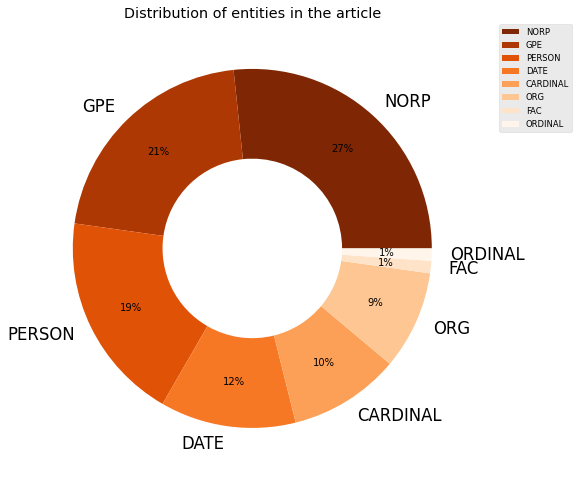

In [1082]:
sns.set_context("talk")
plt.style.use('ggplot')

data_entite.label.value_counts().plot.pie(y="Volume",wedgeprops=dict(width=0.5),
    figsize=(8, 8),
    autopct="%1.0f%%",
    pctdistance=0.75,cmap="Oranges_r",title="Distribution of entities in the article")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
                  borderaxespad=0.0, fontsize='small')

plt.axis("off")
plt.tight_layout()
plt.show()

$~$

note that:

+ PERSON: people, including fictional
+ NORP: nationalities or religious or politicals groups
+ FAC: buildings, airports, highways, bridges, etc
+ ORG: companies, agencies, instituions, ets
+ GPE: countries, cities, states.
+ DATE: absolute or relative date or periods
+ CARDINAL: numerals that do not fall under another type.
+ ORDINAL: "first", "second", etc

$~$

knowing this, we can say that our text information about people, places and groups or nationalities. Let us see below an approximation of how we could answer the questions posed.

$~$

WHO?:

In [1083]:
df_who = pd.DataFrame(data_entite[(data_entite.label == "NORP")
|(data_entite.label == "PERSON")|
(data_entite.label == "ORG")].value_counts().sort_values().sort_index(),columns=["total"])
df_who

total
label  entite                              
NORP   American                           5
       Americans                          5
       French                             3
       German                             1
       Hispanic                           1
       Jewish                             2
       Muslim                             2
       Republican                         2
       Republicans                        2
       rhetoricians                       1
ORG    Fox News                           1
       GOP                                1
       House                              2
       Representative Elise Stefanik      1
       The New York Times                 2
       the Democratic Party               1
PERSON Angela Merkel’s                    1
       Carlson                            2
       Cheney                             1
       Gendron                            3
       George Soros                       1
       Latino                             1
       Liz Cheney                         1
       Matt Gaetz                         1
       Payton S. Gendron                  1
       Robert Donald                      1
       Stefanik                           3
       Tucker Carlson                     1

WHERE?:

In [1084]:
df_where = pd.DataFrame(data_entite[data_entite.label == "GPE"].value_counts(),columns=["total"])
df_where

total
label entite                  
GPE   Buffalo                3
      the United States      3
      El Paso                2
      New Zealand            2
      America                1
      Charleston             1
      Florida                1
      New York               1
      Pittsburgh             1
      S.C.                   1
      Texas                  1
      Washington             1
      Wyoming                1

WHEN?:

In [1085]:
df_where= pd.DataFrame(data_entite[data_entite.label == "DATE"].value_counts(),columns=["total"])
df_where

total
label entite             
DATE  2019              2
      2011              1
      2015              1
      2018              1
      April 2021        1
      Monday            1
      Saturday          1
      September         1
      last year         1
      recent years      1

$~$

In addition to the **NER**, we can also generate a **words cloud plot** to get an idea of what the text is about.

$~$

$~$

##### **performance a wordCloud plot:** (extra):

$~$

As you know **wordcloud** is a technique for displaying frequent words in a text where the size of the words represents their frequency.

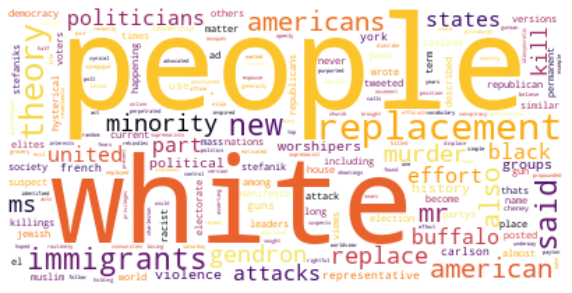

In [1153]:
sns.set_context("talk")
plt.style.use('ggplot')
stop_words=set(stopwords.words("english"))
df_wordcloud = WordCloud(stopwords=stop_words,background_color="white",colormap='inferno',random_state=2022).generate_from_frequencies(dic_freq2)


fig, axes = plt.subplots(figsize =(10, 10))

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

$~$
___
####  Exercise 4

$~$

Perform sentiment analysis on your dataset..


$~$
___

$~$

We are going to performance the sentiment analysis using 2 tools:

$~$

+   using the [**TextBlob** library](https://textblob.readthedocs.io/en/latest/index.html) : we are going to use **.Sentiment** property from this library which return a tuple of form (**polarity**, **subjectivity** ) where **polarity** is a float within the range [-1.0, 1.0] and **subjectivity** is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

+ using Pre-trained [VADER Models for NLTK Sentiment Analysis](https://github.com/cjhutto/vaderSentiment) : it is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength). SentimentIntensityAnalyzer is an object and polarity_scores uses the following categories:

    + Positive. 
    + Negative. 
    + Neutral. 
    + Compound.

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1 (most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text it means:

+ positive sentiment : (compound score >= 0.05) 
+ neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
+ negative sentiment : (compound score <= -0.05)
 

$~$

$~$

 + **using TextBlob**: 
 
 $~$
 
 for this we are going to use the **sentiment_texblob()** function that we have previously defined above. We are going to evaluate each of the sentences of the text and we are going to store the results for both "polarity" and "subjectivity" within the dataframe. We will assign two new columns with the respective names.

$~$


In [1099]:
#keep polarity 
data_text["polarity"] = data_text.transcript.apply(lambda x: sentiment_texblob(0,x))
#keep subjetivity
data_text["subjetivity"] = data_text.transcript.apply(lambda x: sentiment_texblob(1,x))

+ sentence with min polarity:

In [1122]:
print("sentence with min polarity: ", data_text["polarity"].min(),
      "\nsentence: ", data_text["transcript"][data_text["polarity"].idxmin()])


sentence with min polarity:  -0.4318181818181818 
sentence:  The office of one of those politicians, Representative Elise Stefanik of New York, said in a statement that the Buffalo attack was an “act of evil” and that she “has never advocated for any racist position.”The matter is not so simple.Replacement theory is an attack on democracy.


+ sentence with max polarity:

In [1101]:
print("sentence with max polarity: ",data_text["polarity"].max(), 
"\nsentence: ",data_text["transcript"][data_text["polarity"].idxmax()])

sentence with max polarity:  0.3333333333333333 
sentence:  As a practical matter, almost anyone can buy guns that are designed to kill a lot of people quickly.


sentence with min subjetivity:

In [1102]:
print("sentence with min subjetivity: ",data_text["subjetivity"].min(), 
"\nsentence: ",data_text["transcript"][data_text["subjetivity"].idxmin()])

sentence with min subjetivity:  0.0 
sentence:  Gendron described himself as part of a movement.


sentence with max subjetivity:

In [1103]:
print("sentence with max subjetivity: ",data_text["subjetivity"].max(), 
"\nsentence: ",data_text["transcript"][data_text["subjetivity"].idxmax()])

sentence with max subjetivity:  0.8 
sentence:  History has taught us that what begins with words ends in far worse.


metrics for the entire article (using Texblob):

In [1104]:
polarity = sentiment_texblob(0,raw_text)
subjetivity = sentiment_texblob(1,raw_text)

print("polarity find in the article: ",polarity)
print("subjetivity find in the article: ",subjetivity)

polarity find in the article:  0.020867717352092346
subjetivity find in the article:  0.3544879599567099


$~$

Based on the results obtained (polarity=0.020 and subjetivity=0.35 ), we can conclude that in general the article has a rather **objective style** and **low polarity**.

$~$

$~$

 + **using VADER**: 
 
 $~$

 for this we are going to use the **get_sia()** function (which we have defined above), and which receives a text and returns the **"polarity_score"**. we are going to evaluate each of the sentences and store the results inside the dataset, we will assign new columns "neg","neu","pos", and "compound" with the respective metrics

  $~$

In [1140]:
#keep negative metric
data_text["neg"] = data_text.transcript.apply(lambda x: (get_sia(x))["neg"])
#keep neutral metric
data_text["neu"] = data_text.transcript.apply(lambda x: (get_sia(x))["neu"])
#keep positive metric
data_text["pos"] = data_text.transcript.apply(lambda x: (get_sia(x))["pos"])
#keep compound metric
data_text["compound"] = data_text.transcript.apply(lambda x: (get_sia(x))["compound"])

sentence with the most negative sentiment:

In [1145]:
print("sentence most negative sentiment: ",data_text["compound"].min(), 
"\nsentence: ",data_text["transcript"][data_text["compound"].idxmin()])

sentence most negative sentiment:  -0.983 
sentence:  The suspects in several mass killings in recent years, including the 2015 murder of nine Black worshipers at a church in Charleston, S.C.; the 2018 murder of 11 Jewish worshipers at a synagogue in Pittsburgh; the 2019 murder of 51 Muslim worshipers at a pair of mosques in New Zealand; and the 2019 murder of 23 people, many Latino, in El Paso also propounded versions of this racist worldview.American life is punctuated by mass shootings that are routinely described as idiosyncratic.


sentence with the most positive sentiment:

In [1146]:
print("sentence most positive sentiment: ",data_text["compound"].max(), 
"\nsentence: ",data_text["transcript"][data_text["compound"].idxmax()])

sentence most positive sentiment:  0.6124 
sentence:  The same argument is easily applied to other minority groups.The French author Renaud Camus coined the term “the great replacement” in a 2011 book to describe what he saw as a conscious effort by French elites to open the country’s doors for Muslim immigrants to replace the ethnically French population and culture.The template has been adapted for use by extremists around the world.


metrics for the entire article (using VADER):

In [1141]:
get_sia(raw_text)


{'neg': 0.133, 'neu': 0.804, 'pos': 0.063, 'compound': -0.9984}


$~$

From the score obtained (see specifically **compound': -0.9984**) we can conclude that the article above all transmits **negative feelings**.


$~$

$~$
___
####  Conclusions

$~$

+ the scikit-learn library allows the use of a pipeline, which is a tool that allows us to be more efficient throughout the process of creating our machine learning models. In our case we have used this tool to be more efficient in data pre-processing.

+ Regardless of the model that is made, tuning the model's hyperparameters is an effective way to improve their performance. This is what we have been able to verify in our model. We have improved the metrics of the model using the gridsearch method to adjust the hyperparameters.

+ Web Scraping is a technique that we can use to obtain data, in our case we have worked with text, but it could be used to obtain other types of methods.

+ Natural Language Processing (NLP) libraries can help us understand the feelings that texts have. This is how we have done it with the two libraries with which we have worked.




___
$~$

___
$~$

####  *References*:

+ [How to Show Values on Seaborn Barplot](https://www.statology.org/seaborn-barplot-show-values/) 
+ [Python | Stemming words with NLTK](https://www.geeksforgeeks.org/python-stemming-words-with-nltk/) 
+ [Sentiment Analysis: First Steps With Python's NLTK Library](https://realpython.com/python-nltk-sentiment-analysis/) 
+ [Introduction to Stemming and Lemmatization (NLP)](https://medium.com/geekculture/introduction-to-stemming-and-lemmatization-nlp-3b7617d84e65)
+ [Named Entity Recognition (NER) with spaCy](https://medium.com/analytics-vidhya/named-entity-recognition-with-spacy-2ecfa4114162)
+ [Simple word cloud in Python](https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5)

$~$
___